In [1]:
import knearestneighbor

In [2]:
# Read the data.
import pandas as pd

column_names = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
df = pd.read_csv("wine.data", header=None, names=column_names)

# Control the data if it has null variable(s).
df.isnull().sum()

Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [3]:
# Seperate the "feature" and "label" columns. 
feature_columns = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
label_column = ['Class']

# Assign X and y due to these columns.
X = df[feature_columns]
y = df[label_column]

In [4]:
# Split the data as train and test.
from sklearn.model_selection import train_test_split

# Default test rate is 20%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

y_train = y_train.iloc[:, -1].values.flatten()
y_test = y_test.iloc[:, -1].values.flatten()

y_train = pd.DataFrame(y_train, columns=['Class'])
y_test = pd.DataFrame(y_test, columns=['Class'])

In [5]:
# Scale the data to avoid the errors resulting from the big data differencies.
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[feature_columns])
X_test = pd.DataFrame(X_test, columns=[feature_columns])

In [6]:
# Run the algorithm.
max_accuracy = [1, 90]
accs = []

for k in range(1,9,2):    
    y_pred = knearestneighbor.knn(X_train, X_test, y_train, k)

    y_test_values = y_test["Class"].tolist()

    acc = knearestneighbor.accuracy(y_test_values, y_pred)

    if acc > max_accuracy[1]:
        max_accuracy = [k, acc]

    accs.append(acc)

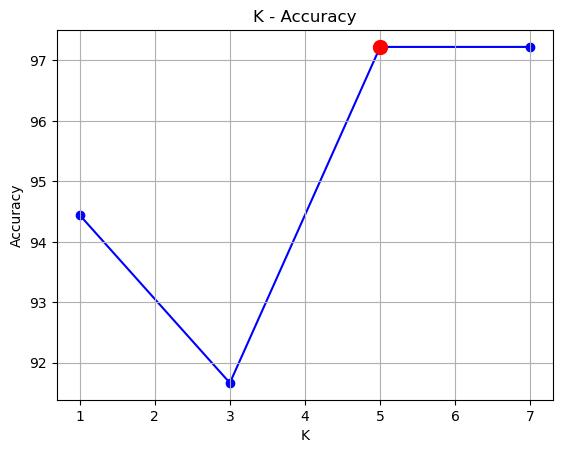

In [7]:
# Sketch K - Accuracy graph.
import matplotlib.pyplot as plt

k = range(1,9,2)
k_list = list(k)

plt.plot(k_list, accs, marker='o', linestyle='-', color='b', zorder=1)

# Highlight the optimal k value point.
plt.scatter(max_accuracy[0], max_accuracy[1], marker='o', color='r', s=100, zorder=3)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("K - Accuracy")
plt.grid(True)
plt.show()

In [8]:
# Create the Confusion Matrix.
from sklearn.metrics import confusion_matrix

y_pred = knearestneighbor.knn(X_train, X_test, y_train, 5)
y_test_values = y_test["Class"].tolist()

cm = confusion_matrix(y_test_values, y_pred)
print(cm)

[[ 8  0  0]
 [ 0 14  1]
 [ 0  0 13]]


In [9]:
# Create the Classification Report.
from sklearn.metrics import classification_report

print(classification_report(y_test_values, y_pred, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn'))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      0.93      0.97        15
           3       0.93      1.00      0.96        13

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36

